# Introduction

#### In this notebook, I will be working with the Titanic dataset, which contains information about passengers such as their names, ages, genders, socio-economic class, and more. The main goal of this analysis is to explore, clean, and visualize the data to gain insights and understand patterns that might help in predicting the survival of passengers.

## Objectives
#### - **Data Exploration**: First, I'll delve into the dataset to understand its structure, distribution of variables, and any potential patterns.
#### - **Data Cleaning**: After exploring the data, I'll focus on cleaning the dataset by handling missing values, correcting data types, and addressing any inconsistencies.
#### - **Data Visualization**: Finally, I'll create various visualizations to represent the data graphically, which will help in identifying trends and relationships between different features.

#### Through these steps, I'll aim to prepare the dataset for further modeling and analysis.


In [197]:
# data analysis
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

##### Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the training datasets into Pandas DataFrames.

In [198]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000) 
train_df = pd.read_csv(r"D:\train.csv")


#### Exploring features
we need to explore the feature in our dataset to descripe them in the next step

In [199]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Sorting the data :

### Why i do this step ? 
- This step help us to select the appropriate plots for visualization.

### Which features are categorical ?
- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

### Which features are numerical ?
- Continous: Age, Fare. Discrete: SibSp, Parch.



These feature names are described on [Kaggle data page here.](https://www.kaggle.com/c/titanic/data).


In [200]:
# preview the data
print(train_df.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


In [201]:
# To know the data types of the columns
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### After showing the info we find :
- PassengerId column should be string : because we will not need to treat in intger 
- Survived column is a bool (1 = survived , 0 = died)
- Pclass column should be categorical data (1 = 1st , 2 = 2nd , 3 = 3rd)
- Sex column is categorical data (male , female)
- Embarked column is categorical data (C = Cherbourg, Q = Queenstown, S = Southampton)

In [202]:
# we here convert the PassengerId to string as it is not a numerical value
train_df['PassengerId'] = train_df['PassengerId'].astype('str')

# we here convert the Pclass to category
train_df['Pclass'] = train_df['Pclass'].map({1: '1st', 2: '2nd', 3: '3rd'})
train_df['Pclass'] = train_df['Pclass'].astype('category')


In [203]:
# before we convert the sex column , we need to explore it 
print(train_df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [204]:
# we here convert the sex to category
train_df['sex'] = train_df['Sex'].astype('category')

In [205]:
# before we convert the Embarked column , we need to change values in it
train_df['Embarked'] = train_df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# we here convert the Embarked to category
train_df['Embarked'] = train_df['Embarked'].astype('category')


After we explore the data and convert the columns to types we want .
now , we need to see if there nan values and the way to treat with it 

In [206]:
# explore the NaN values in each column 
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
sex              0
dtype: int64


After we saw the NaN values in each column we find :
- Age column has 177 null values : This null values we will affect on the conclusion so we have two ways to treat them :

First : we can replace the null values with the (mean or median) in this case i prefer the median

Secand : we can drop rows with null values in age columns 

How we decide ?
- We find the ratio of null values is 22 % of all data and it is a large ratio then we will not do this step 
- So we will take the other way i will choose the median to protect the data from the outliers as we know the mean affect with the outliers 

Other NaN values in (Cabin and Embarked) columns do not affect .

In [207]:
# we will fill the NaN values in the Age column with the median of the column
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# we will check the NaN values in the Age column after filling them
print(train_df['Age'].isnull().sum())


0


#### After exploring and cleaning the data we will move to visualize it and get pattern and understand the relations between them.

# Visualization Steps :
1. **Age Distribution Analysis**
   - **Objective**: Visualize the distribution of passenger ages to understand the overall age spread.
   - **Visualization**: Use a Histogram or KDE plot to observe how ages are distributed across the dataset.



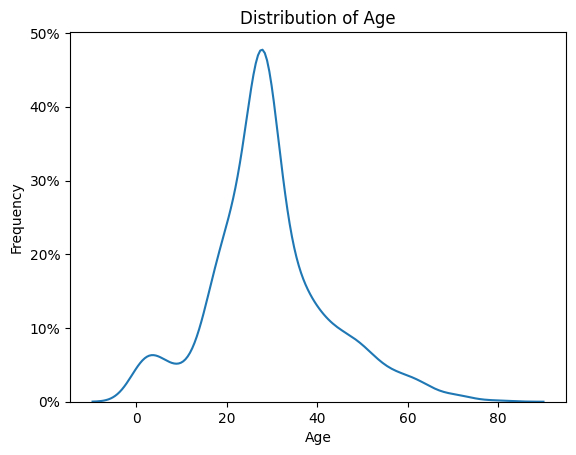

In [208]:
# we will use KDE plot to explore the distribution of the Age column
from matplotlib.ticker import PercentFormatter


sns.kdeplot(train_df['Age'],legend=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
ax = plt.gca()  # define 'ax' as the current axes
ax.yaxis.set_major_formatter(PercentFormatter(xmax=.1))
plt.show()

After the KDE plot we find the almost ages between 20 years and 40 years old

2. **Survival Based on Age**
   - **Objective**: Analyze the relationship between age and survival rates to see if age had an impact on survival chances.
   - **Visualization**: Create a Box plot or Violin plot to compare the age distribution of passengers who survived versus those who did not.


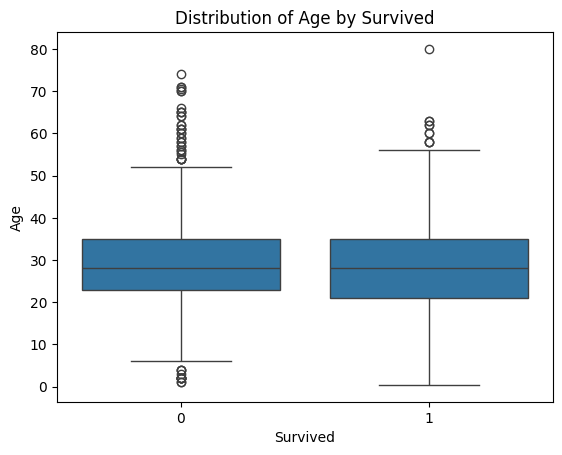

In [209]:
# we will use a box plot to compare the distribution of the Age column and who survived
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Distribution of Age by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

3. **Age Distribution Across Passenger Classes**
   - **Objective**: Explore how age varies across different passenger classes (Pclass) to identify any notable trends.
   - **Visualization**: Use a Box plot or Strip plot to visualize the age distribution within each passenger class.


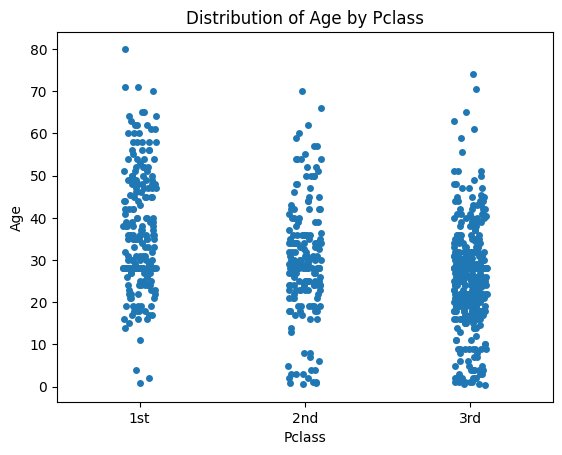

In [210]:
# we will use a strip plot to compare the distribution of the Age column and the Pclass
sns.stripplot(x='Pclass', y='Age', data=train_df)
plt.title('Distribution of Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

We discovered the most passenger in 3rd class

4. **Age and Gender Comparison**
   - **Objective**: Compare the age distribution between male and female passengers to detect any significant differences.
   - **Visualization**: Utilize a Swarm plot or Box plot to display how ages are distributed among male and female passengers.


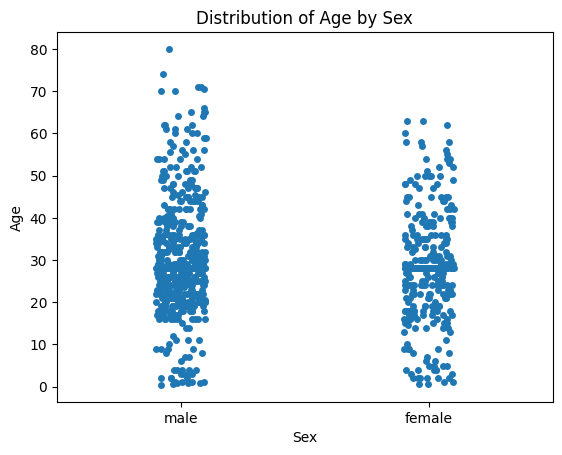

In [211]:
# we will use a strip plot to compare the distribution of the Age column and sex column
sns.stripplot(data=train_df , x='Sex', y='Age')
plt.title('Distribution of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

5. **Age and Gender Influence on Survival**
   - **Objective**: Investigate the combined influence of age and gender on survival rates.
   - **Visualization**: Implement a FacetGrid with Histogram or KDE plots to split the data by gender and visualize the age distribution for survivors and non-survivors.


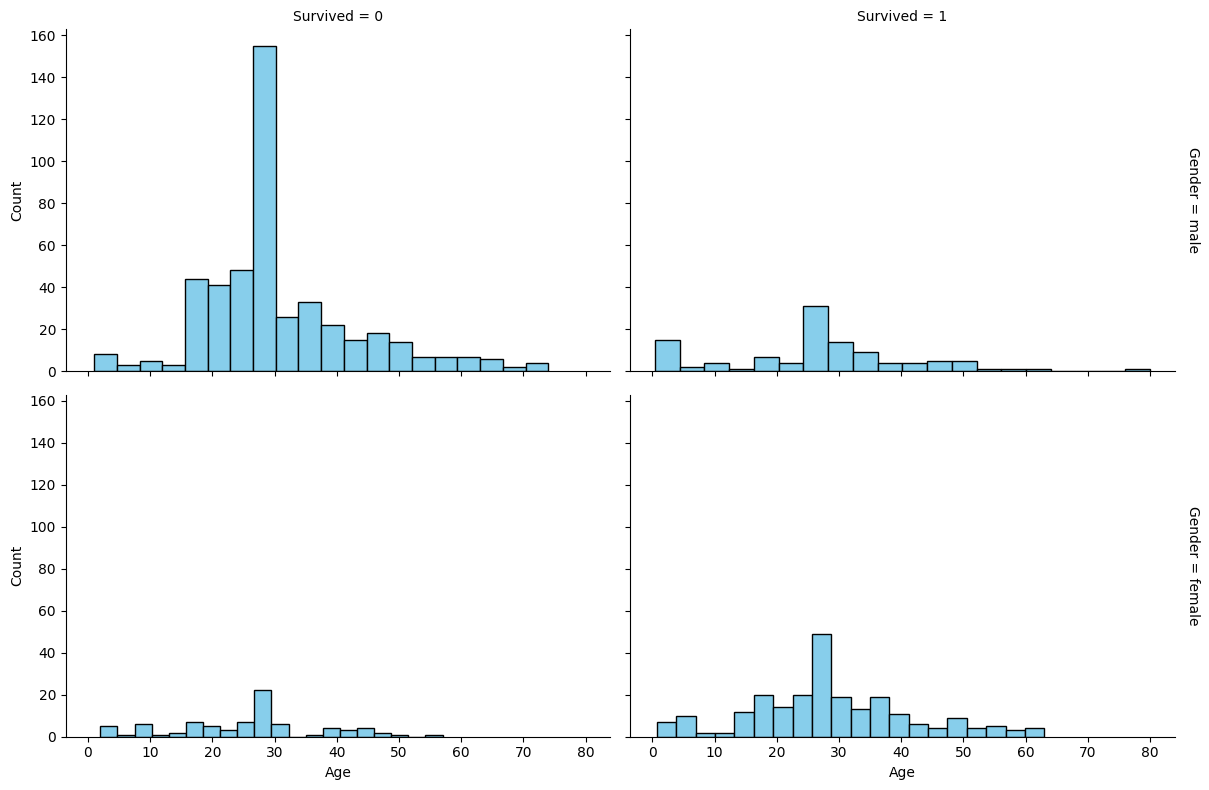

In [212]:
# we will use a FacetGrid with Histogram or KDE plots to split the data by gender and visualize the age distribution for survivors and non-survivors.
# Create a FacetGrid
g = sns.FacetGrid(train_df, col="Survived", row="Sex", margin_titles=True, height=4, aspect=1.5)

# Map the histogram to the grid
g.map(plt.hist, "Age", bins=20, color="skyblue", edgecolor="black")

# Add titles
g.set_axis_labels("Age", "Count")
g.set_titles(col_template="Survived = {col_name}", row_template="Gender = {row_name}")

# Show the plot
plt.show()

6. **Fare Distribution Analysis**
   - **Objective**: Visualize the distribution of fares to understand how ticket prices vary among passengers.
   - **Visualization**: Use a Histogram or KDE plot to observe how fares are distributed across the dataset.


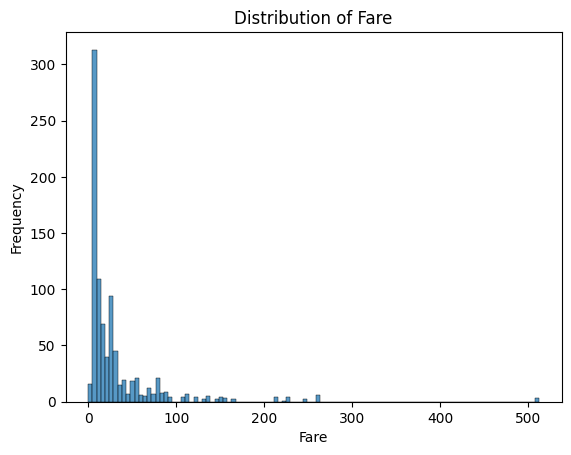

In [214]:
# we will use a Histogram to explore the distribution of the Fare column
sns.histplot(train_df['Fare'])
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

we notice the most is less 100 dollars fare but we see the outliers 

7. **Survival Based on Fare**
   - **Objective**: Analyze the relationship between fare amounts and survival rates to see if fare had an impact on survival chances.
   - **Visualization**: Create a Box plot or Violin plot to compare the fare distribution of passengers who survived versus those who did not.


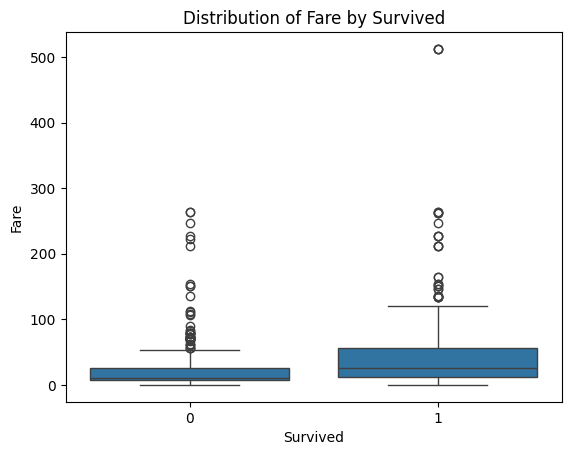

In [215]:
# we will use a box plot to compare the distribution of the Fare column and who survived
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Distribution of Fare by Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

we notice the diffrance between who survived with high Fare otherwise less Fare

8. **Fare Distribution Across Passenger Classes**
   - **Objective**: Explore how fares vary across different passenger classes (Pclass) to identify any notable trends.
   - **Visualization**: Use a Violin plot or Box plot to visualize the fare distribution within each passenger class.


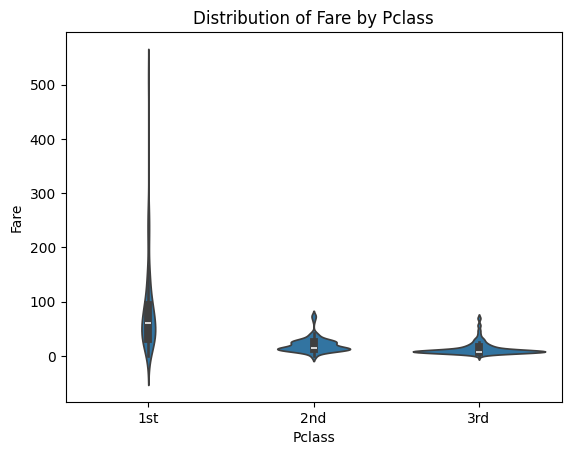

In [216]:
# we will use a viloin plot to compare the distribution of the Fare column and the Pclass
sns.violinplot(x='Pclass', y='Fare',data=train_df)
plt.title('Distribution of Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

9. **Correlation Heatmap**
   - **Objective**: Identify the relationships between different numerical variables in the dataset to find patterns or correlations.
   - **Visualization**: Implement a Heatmap to visualize the correlation matrix between variables such as Age, Fare, Pclass, and Survived.


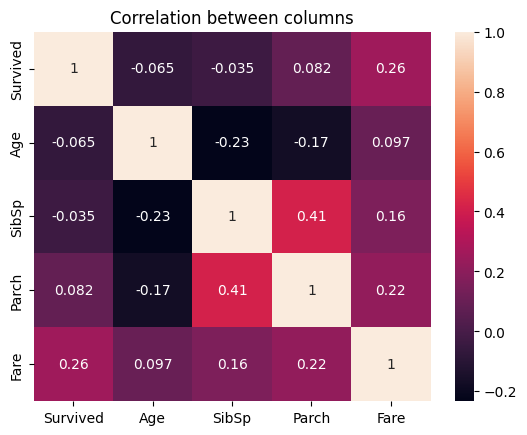

In [218]:
# Remove non-numeric columns from the dataframe
numeric_df = train_df.select_dtypes(include=[np.number])

# Create the heatmap using the numeric dataframe
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation between columns')
plt.show()

### Correlation Heatmap Explanation

The heatmap above displays the correlation between different variables in the dataset:
- **Survived** has a moderate positive correlation with **Fare** (0.26), which implies that passengers who paid higher fares had a higher chance of survival.
- **SibSp** and **Parch** have a strong positive correlation (0.41), indicating that the number of siblings/spouses and parents/children tend to increase together.
- **Age** has weak or negligible correlation with all other variables.
  
The color scale on the right indicates the strength and direction of correlations, with values close to 1 being strong positive correlations, and values close to -1 indicating strong negative correlations.


10. **Pair Plot for Numerical Variables**
   - **Objective**: Explore pairwise relationships between numerical variables like Age, Fare, and Pclass . 
   - **Visualization**: Use a Pair plot to visualize the interactions between multiple numerical variables and how they relate to survival.

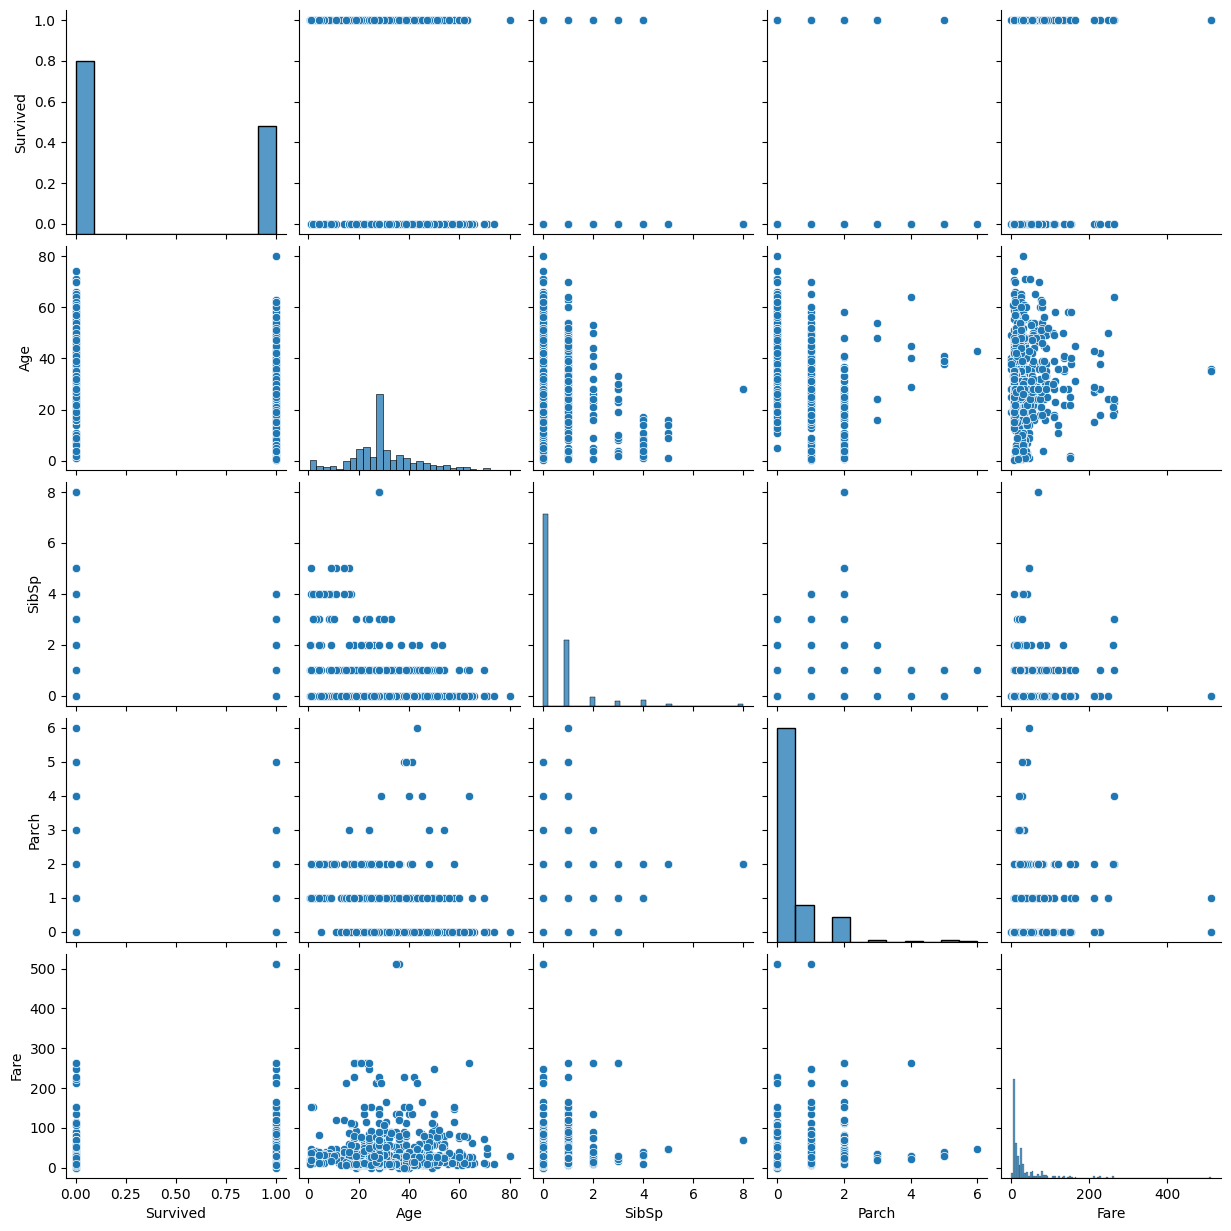

In [219]:
# we will use a pairplot to explore the relationship between the columns
sns.pairplot(train_df)
plt.show()

11. **Survival Rate by Embarked Location**
   - **Objective**: Investigate the impact of embarkation location on survival rates
   - **Visualization**: Use a Bar plot to compare survival rates based on the location where passengers embarked (C, Q, S) and relation with Sex.

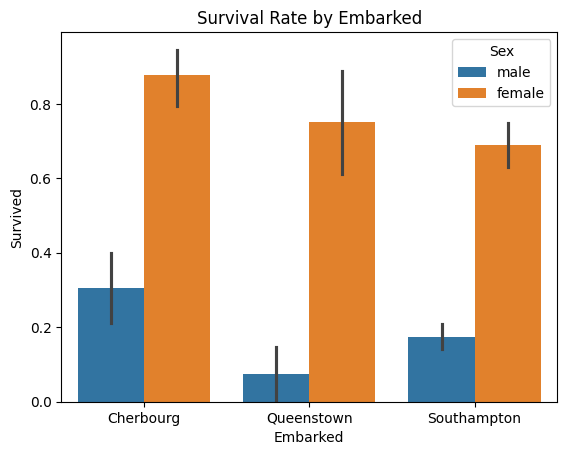

In [221]:
# we will use a Bar plot to compare survival rates based on the location where passengers embarked (C, Q, S) and relation with Sex.
sns.barplot(x='Embarked', y='Survived', data=train_df , hue='Sex')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()

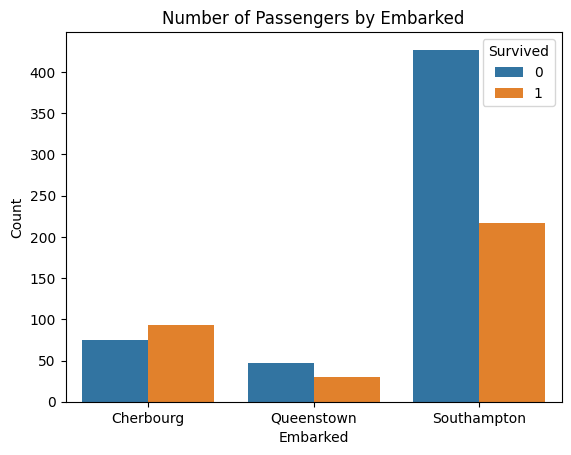

In [222]:
# we will use a count plot to compare the number of passengers who survived and who did not based on the location where passengers embarked (C, Q, S)
sns.countplot(x='Embarked', data=train_df , hue='Survived')
plt.title('Number of Passengers by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

12. **Age, Fare, and Survival Relationship**
   - **Objective**: Analyze the combined influence of age and fare on survival rates to see if certain age and fare combinations had higher survival chances.
   - **Visualization**: Use a FacetGrid to create scatter plots of Age versus Fare, separated by survival status, to observe patterns.

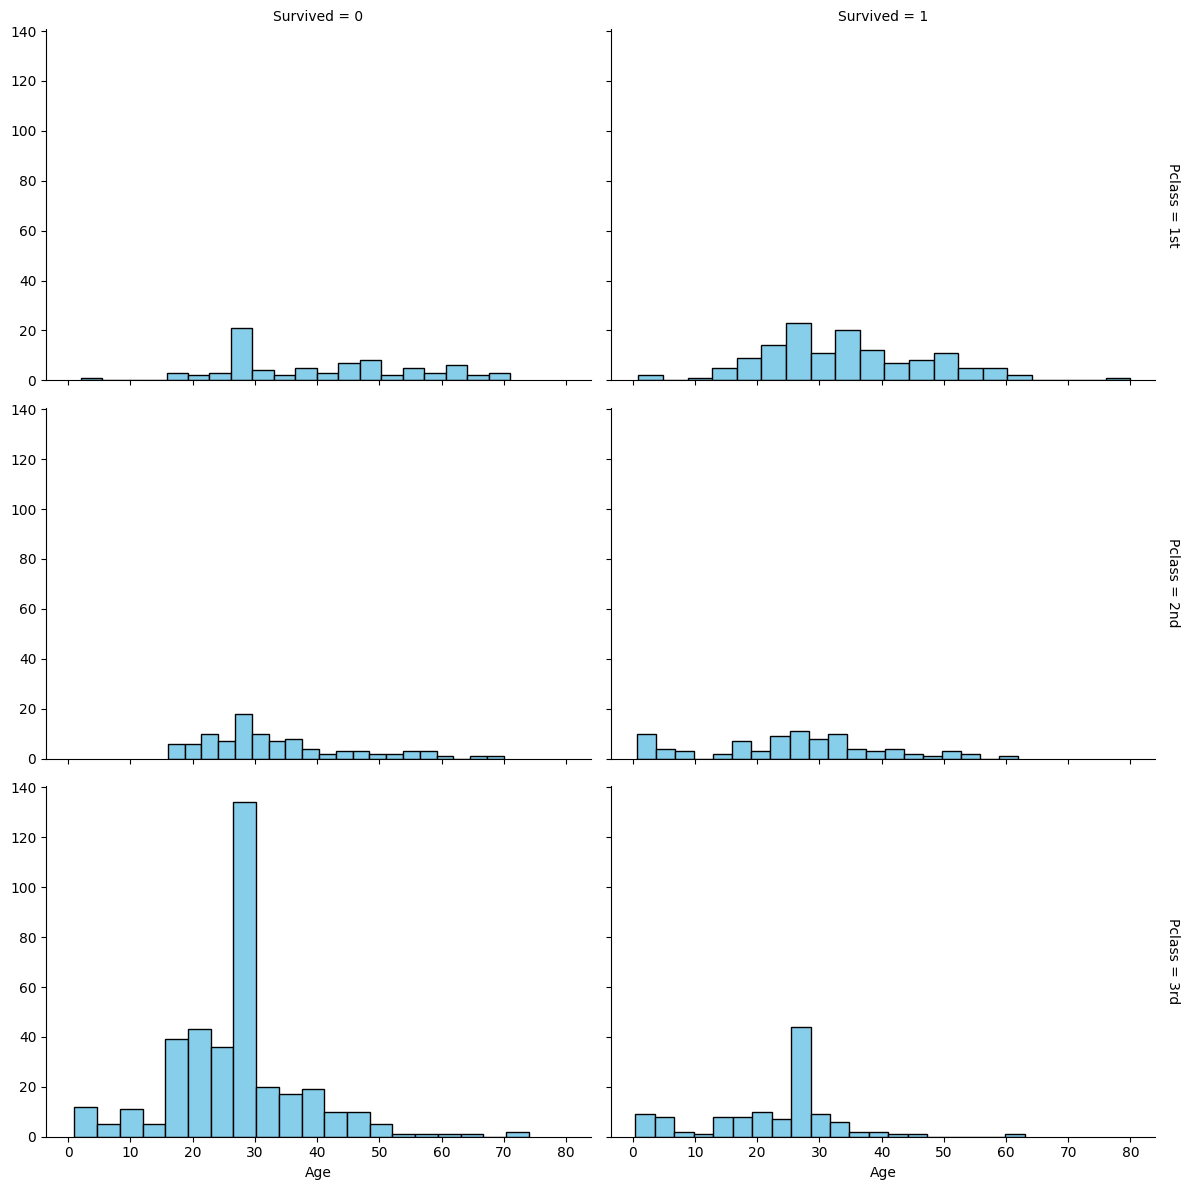

In [223]:
# we will use a FaceGrid to explore the relationship between the columns
sns.FacetGrid(train_df, col='Survived', row='Pclass', margin_titles=True, height=4, aspect=1.5).map(plt.hist, 'Age', bins=20, color='skyblue', edgecolor='black')
plt.show()

# Conclusion:
In this analysis of the Titanic dataset, we explored the relationships between key features (such as age, passenger class, and survival outcomes) through data visualizations and basic statistical analysis.
### Key findings include:
- **Passenger Class and Survival**:There is a clear relationship between passenger class and survival. Passengers in 1st class had a significantly higher survival rate compared to those in 2nd and 3rd class. This suggests that socio-economic status played a critical role in survival chances.
- **Age Distribution**:Younger passengers, especially children, had higher survival rates. This indicates that age was an important factor in survival, with younger passengers potentially receiving priority during evacuation efforts.
- **Combined Impact of Age and Class**:When we explored the interaction between age and class, it became evident that being in a higher class improved survival chances across most age groups. However, younger passengers in lower classes still had better survival odds than older passengers in the same class.

### Further analysis, such as feature engineering or predictive modeling, could build on these insights to predict survival rates more accurately. Overall, this exploration sheds light on the socio-economic and demographic factors that influenced survival on the Titanic.